### 1. Explore the data

In [54]:
# Load the dataset and identify missing values, duplicates, and inconsistent data

In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [58]:
#Loading the dataset
train_df=pd.read_csv("train.csv")
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [60]:
#Identifying missing values
train_df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [62]:
#duplicates
train_df.duplicated().sum()

0

In [64]:
train_df.dtypes.value_counts()

object     43
int64      35
float64     3
Name: count, dtype: int64

### 2. Handling missing values

In [67]:
num_cols = train_df.select_dtypes(include=[np.number]).columns
cat_cols = train_df.select_dtypes(include=["object"]).columns

In [76]:
for col in num_cols:
    if train_df[col].isnull().sum() > 0:
        train_df[col].fillna(train_df[col].mean(),inplace=True)

for col in cat_cols:
    if train_df[col].isnull().sum()>0:
        train_df[col].fillna(train_df[col].mode()[0],inplace=True)

train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Grvl,Reg,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Grvl,Reg,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,Grvl,IR1,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,Grvl,IR1,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,Grvl,IR1,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,12,2008,WD,Normal,250000


### 3. Data Visualization

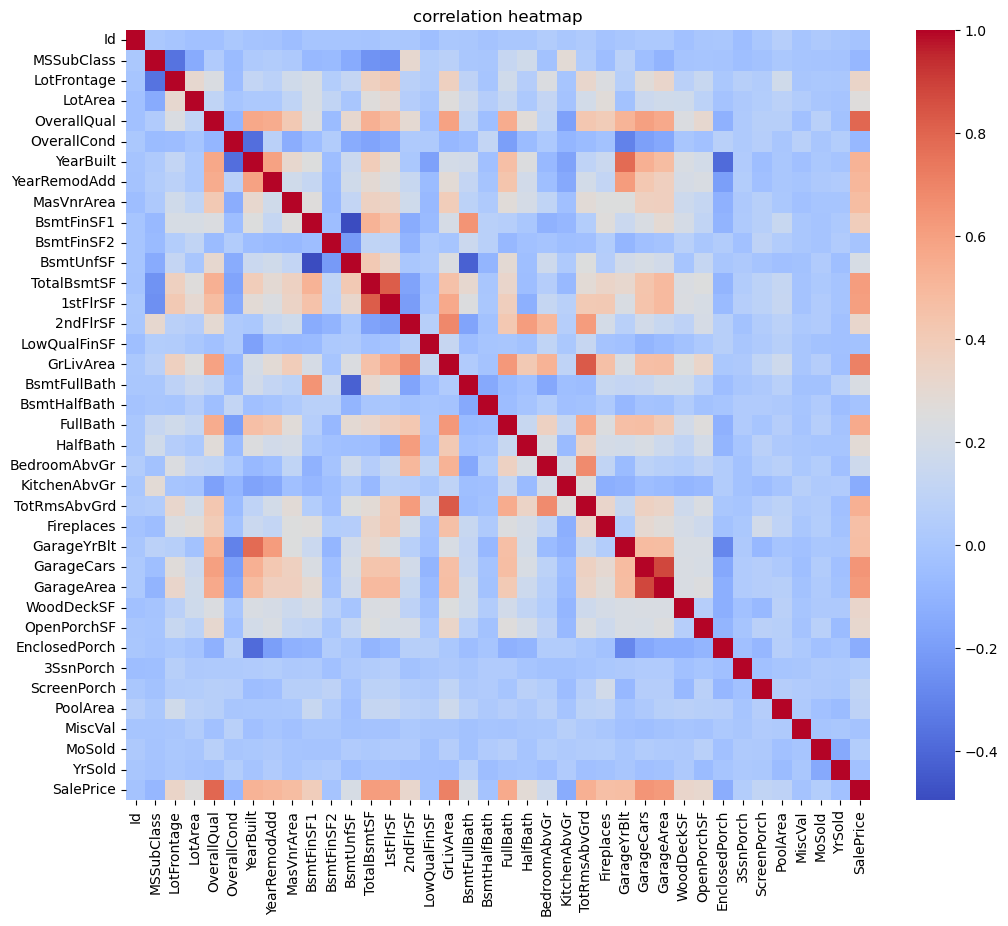

In [80]:
#correlation heatmap
plt.figure(figsize=(12,10))
corr_matrix=train_df[num_cols].corr()
sns.heatmap(corr_matrix, annot= False, cmap = 'coolwarm', fmt='.2f')
plt.title('correlation heatmap')
plt.show()

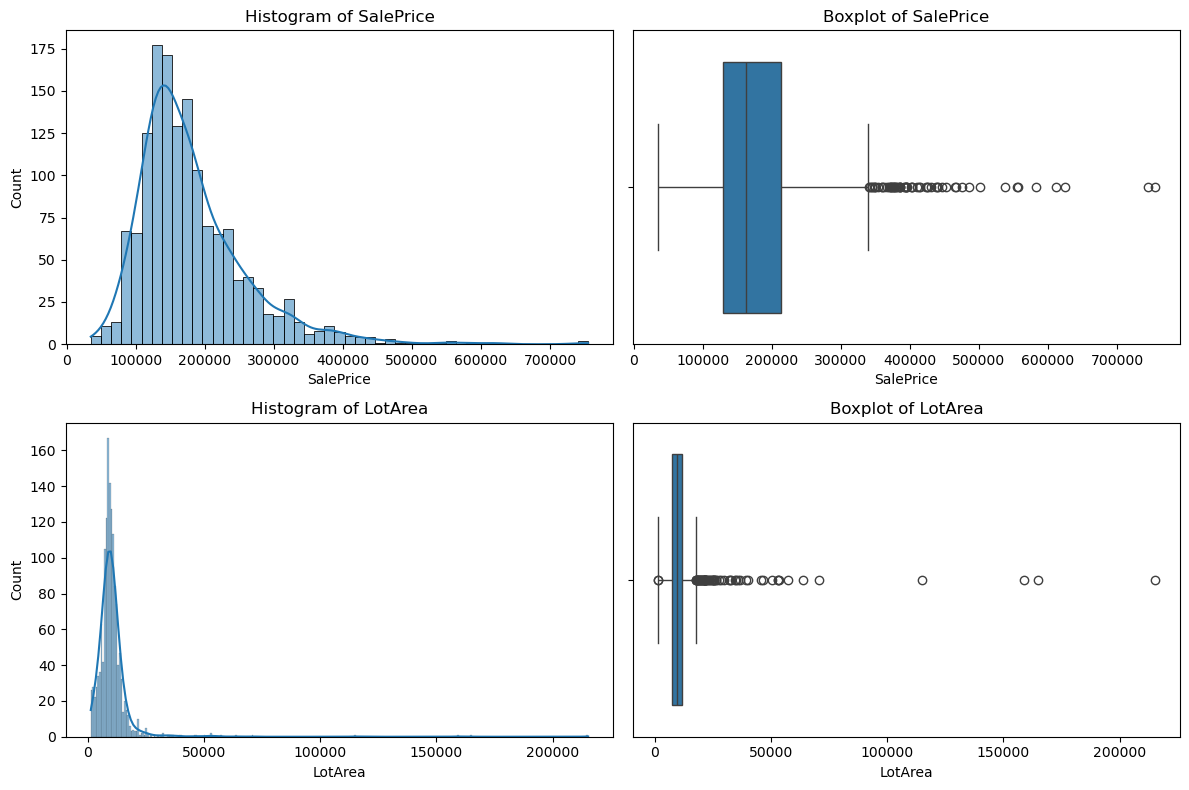

In [82]:
#histograms and boxplots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
sns.histplot(train_df['SalePrice'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Histogram of SalePrice')
sns.boxplot(x=train_df['SalePrice'], ax=axes[0, 1])
axes[0, 1].set_title('Boxplot of SalePrice')
sns.histplot(train_df['LotArea'], kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Histogram of LotArea')
sns.boxplot(x=train_df['LotArea'], ax=axes[1, 1])
axes[1, 1].set_title('Boxplot of LotArea')
plt.tight_layout()
plt.show()

### 4. Encode categorical features:

In [91]:
print(train_df.columns.tolist())


['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscFeature', 'M

In [97]:
# Identify columns that start with 'Neighborhood' or 'MSZoning'
cols_to_encode = [col for col in train_df.columns if col.startswith('Neighborhood') or col.startswith('MSZoning')]

# One-hot encode these columns
train_df = pd.get_dummies(train_df, columns=cols_to_encode, drop_first=True)

for col in train_df.select_dtypes(include='bool').columns:
    train_df[col] = train_df[col].astype(int)

train_df.head()

,Id,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,Neighborhood_Sawyer_True_True_True,Neighborhood_SawyerW_True_True_True,Neighborhood_Somerst_True_True_True,Neighborhood_StoneBr_True_True_True,Neighborhood_Timber_True_True_True,Neighborhood_Veenker_True_True_True,MSZoning_FV_True_True_True,MSZoning_RH_True_True_True,MSZoning_RL_True_True_True,MSZoning_RM_True_True_True
0,1,60,65.0,8450,Pave,Grvl,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,0,0,0,1,0
1,2,20,80.0,9600,Pave,Grvl,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,1,0,0,1,0
2,3,60,68.0,11250,Pave,Grvl,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,0,0,0,1,0
3,4,70,60.0,9550,Pave,Grvl,IR1,Lvl,AllPub,Corner,...,0,0,0,0,0,0,0,0,1,0
4,5,60,84.0,14260,Pave,Grvl,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,0,0,0,1,0


### Feature Scaling

In [100]:
# Normalize LotArea
minmax_scaler = MinMaxScaler()
train_df['LotArea_Norm'] = minmax_scaler.fit_transform(train_df[['LotArea']])

# Standardize GrLivArea
std_scaler = StandardScaler()
train_df['GrLivArea_Std'] = std_scaler.fit_transform(train_df[['GrLivArea']])


In [102]:
# Save cleaned data
train_df.to_csv("cleaned_train.csv", index=False)

In [104]:
print(f"Number of Features After Encoding: {train_df.shape[1]}")
print(f"Top Correlated Features with SalePrice:\n{corr_matrix['SalePrice'].sort_values(ascending=False).head(10)}")

Number of Features After Encoding: 109
Top Correlated Features with SalePrice:
SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64


### Report